### [EXP-2] Exploration 2 Project  
    - [EXP-2] 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!  
    - [EXP-2] 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?  
  
---
      

##### [EXP-2] 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

(1) 데이터 가져오기  
+ sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.  
+ diabetes의 data를 df_X에, target을 df_y에 저장해주세요.  

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

#데이터셋을 가져옴.
dataset = load_diabetes()

df_X = dataset.data
df_y = dataset.target

# 가져온 데이터의 정보 표시.
print(dataset.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

dataset은 ['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']으로 구성됨.  
data는 age, sex, body mass index, average blood pressure, and six blood serum measurements 의 10개 feature(float64)로 442개의 데이터임.  
       값은 모두 -0.2 ~ 0.2 사이 값으로 정규화된것으로 보임. target필드가 포함되지 않음.  
target은 float64로 정규화되지 않음.  

  
(2) 모델에 입력할 데이터 X 준비하기  
+ df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.  
  
(3) 모델에 예측할 데이터 y 준비하기  
+ df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.  

In [2]:
df_X = np.array(dataset.data)
df_y = np.array(dataset.target)

(4) train 데이터와 test 데이터로 분리하기  
+ X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
            train_test_split(df_X, df_y, test_size=0.2, random_state=10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


(5) 모델 준비하기  
+ 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.  
+ 모델 함수를 구현해주세요.  

In [31]:
#10개의 feature이므로, 10개의 임의의 가중치를 생성.
W = np.random.rand(10)
b = np.random.rand()

# 모델링 학습을 통해 얻은 가중치와 바이어스값을 초기 값으로 사용함.
# W = [  -3.66324289, -225.33531248,  518.44491357,  328.07451472, -697.15863396,  387.49533505,   66.84230835,  214.04715832, 692.76037926,   40.1774417 ]
# b = 152.2490963436998

# 모델을 정의. 
def model(X, W, b):
    return np.dot(X, W) + b

print("initial W, b : \nW: ", W, "\n b: ", b)

initial W, b : 
W:  [0.07332249 0.96040964 0.42975559 0.71942432 0.30785114 0.79419782
 0.94695921 0.91601045 0.39764719 0.16206984] 
 b:  0.2686769533544202


(6) 손실함수 loss 정의하기  
+ 손실함수를 MSE 함수로 정의해주세요.

In [32]:
from sklearn.metrics import mean_squared_error

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    # mse = mean_squared_error(a, b)
    return mse

# MSE를 사용하는 손실함수를 정의.
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


(7) 기울기를 구하는 gradient 함수 구현하기  
+ 기울기를 계산하는 gradient 함수를 구현해주세요.

In [33]:
def gradient(X, W, b, y):
    """가중치와 바이어스의 기울기를 구하는 함수.

    Args:
        X (_type_): 테스트 데이터
        W (_type_): 가중치
        b (_type_): 바이어스
        y (_type_): 테스트 정답

    Returns:
        가중치와 바이어스 기울기.
    """
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

(8) 하이퍼 파라미터인 학습률 설정하기  
+ 학습률, learning rate 를 설정해주세요  
+ 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.  

In [34]:
LEARNING_RATE = 0.001

(9) 모델 학습하기  
+ 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.  
+ loss값이 충분히 떨어질 때까지 학습을 진행해주세요.  
+ 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.  

In [35]:
# machine learning
losses = []

# 모델 학습.
for i in range(1, 500000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    
    if i % 5000 == 0:
        losses.append(L)
    
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

W, b

Iteration 10000 : Loss 2927.2074
Iteration 20000 : Loss 2874.1519
Iteration 30000 : Loss 2869.7187
Iteration 40000 : Loss 2868.7720
Iteration 50000 : Loss 2868.1995
Iteration 60000 : Loss 2867.6931
Iteration 70000 : Loss 2867.2104
Iteration 80000 : Loss 2866.7440
Iteration 90000 : Loss 2866.2920
Iteration 100000 : Loss 2865.8535
Iteration 110000 : Loss 2865.4280
Iteration 120000 : Loss 2865.0151
Iteration 130000 : Loss 2864.6142
Iteration 140000 : Loss 2864.2250
Iteration 150000 : Loss 2863.8471
Iteration 160000 : Loss 2863.4802
Iteration 170000 : Loss 2863.1238
Iteration 180000 : Loss 2862.7777
Iteration 190000 : Loss 2862.4416
Iteration 200000 : Loss 2862.1151
Iteration 210000 : Loss 2861.7980
Iteration 220000 : Loss 2861.4900
Iteration 230000 : Loss 2861.1908
Iteration 240000 : Loss 2860.9002
Iteration 250000 : Loss 2860.6180
Iteration 260000 : Loss 2860.3438
Iteration 270000 : Loss 2860.0775
Iteration 280000 : Loss 2859.8188
Iteration 290000 : Loss 2859.5675
Iteration 300000 : Loss

(array([  -1.36677344, -222.36358475,  523.98582322,  325.65987862,
        -389.26982118,  147.1437295 ,  -70.58910301,  171.70686325,
         574.84306839,   41.75624933]),
 152.1830785753005)

(10) test 데이터에 대한 성능 확인하기  
+ test 데이터에 대한 성능을 확인해주세요.

In [36]:
# 최적값으로 예측하기.
prediction = model(X_test, W, b)

# MSE를 통한 성능 평가.
mse = MSE(prediction, y_test)

print(mse)

2924.5584520771877


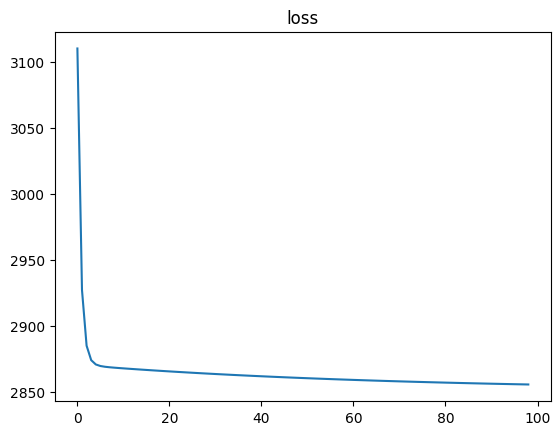

In [37]:
import matplotlib.pyplot as plt

# 모델 학습에 따른 오차 표시.
plt.plot(losses)

plt.title("loss")

plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

#scikit-learn에서 제공하는 선형 회귀 모델
model2 = LinearRegression()

#model을 x와 y 데이터셋을 이용하여 학습시킴
model2.fit(X_train, y_train)

#model이 'patient' 데이터에 대해 예측한 값을 array로 반환
predictions = model2.predict(X_test)

#testset에 대해 model의 정확도를 판단
mse = mean_squared_error(y_test, predictions)
mse

2911.811886119178

--> 학습시에는 mse가 2855이 나왔으나, test데이터에 대한 성능 평가시 mse값이 2924.5584520771877 높게 나왔다.  
이는 sklearn의 LinearRegression실행결과 2911보다 높게나왔다.  

(11) 정답 데이터와 예측한 데이터 시각화하기  
+ x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.  

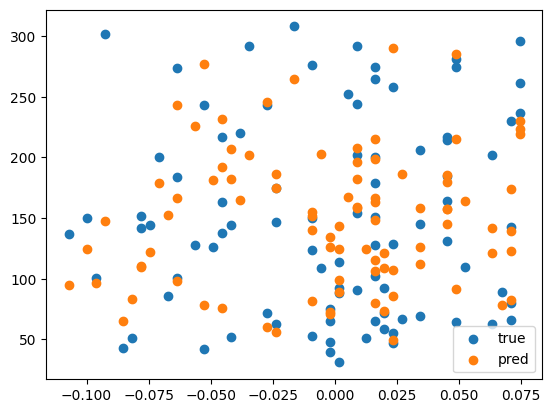

In [40]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

(12) 회고.  
 - 반복학습을 늘리면 학습시 loss가 2870까지도 낮아지는것을 확인했다.
 - 하지만, 학습시간이 sklearn의 라이브러리보다 훨씬 긴 시간이 걸렸기 때문에 단순히 반복학습 횟수를 늘리는게 최적화인가라는 의문이 든다.
 - 또한 학습시의 오차보다 테스트의 오차가 높게 나왔는데, 과적합이 발생한것 같다. 

---  

##### [EXP-2] 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
  

(1) 데이터 가져오기  
+ 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.  
+ 여기에서 데이터를 상세히 확인할 수 있습니다.  

In [17]:
import pandas as pd

#dataset 준비.
# train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train = pd.read_csv('/home/evergrin/python/data/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기  
+ to_datetime 활용 : 링크 참조  
+ pandas datetime extract year month day 키워드로 검색해 보기  

In [18]:
import datetime as dt

#train['year'] = train['datetime'].dt.year
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day

train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


(3) year, month, day, hour, minute, second 데이터 개수 시각화하기  
+ sns.countplot 활용해서 시각화하기  
+ subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기  

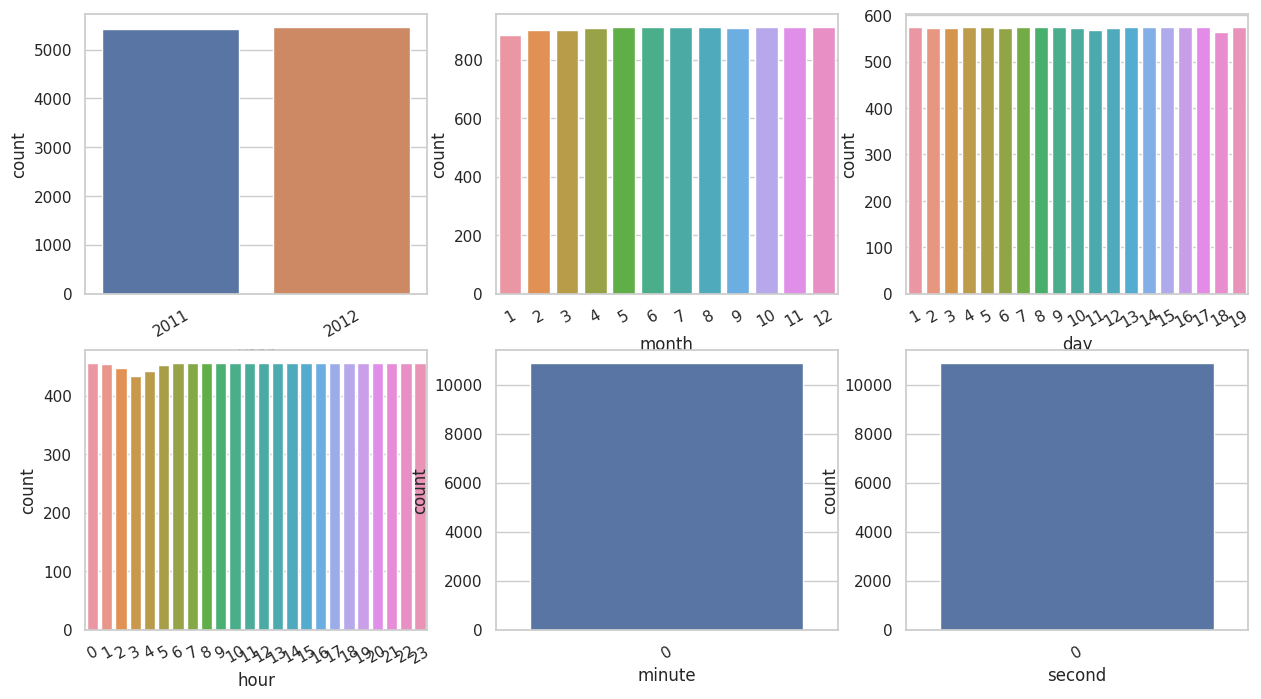

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig  = plt.figure(figsize=(15, 8))
axies = fig.subplots(nrows=2, ncols=3)

date_types = [['year', 'month', 'day'], ['hour', 'minute', 'second']]

for row in range(2):
    for col in range(3):
        axie = axies[row][col]
        sns.countplot(data=train, x=date_types[row][col], ax=axie)
        axie.tick_params(axis='x', rotation=30)

plt.show()

(4) X, y 컬럼 선택 및 train/test 데이터 분리  
+ X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다.  
+ 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.  
+ ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
   -  count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

--->
 - 아래와 같이 Fields가 있는데, hourly date이므로 datetime, minute, second는 불필요하다.  
 - count 컬럼도 target이므로 학습시 불필요
 - casual과 registered는 각각의 합이 count이고 다른 조건들로 인하여 발생한 결과이므로 제외.

Data Fields  
+ datetime - hourly date + timestamp  
+ season -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
+ holiday - whether the day is considered a holiday  
+ workingday - whether the day is neither a weekend nor holiday  
+ weather 
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
+ temp - temperature in Celsius  
+ atemp - "feels like" temperature in Celsius  
+ humidity - relative humidity  
+ windspeed - wind speed  
+ casual - number of non-registered user rentals initiated  
+ registered - number of registered user rentals initiated  
+ count - number of total rentals  

In [42]:
from sklearn.model_selection import train_test_split

y = train['count']
train.drop(columns=['datetime', 'casual', 'registered', 'count', 'minute', 'second'], inplace=True)

# good_weather column add.
train['good_weather'] = train['weather'] == 1
#train.drop(columns=['good_weather'], inplace=True)

print(train.head())
print(train.columns)

X_train, X_test, y_train, y_test = \
            train_test_split(train, y, test_size=0.2, random_state=12)


print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  day  hour  good_weather  
0  2011      1    1     0          True  
1  2011      1    1     1          True  
2  2011      1    1     2          True  
3  2011      1    1     3          True  
4  2011      1    1     4          True  
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'good_weather'],
      dtype='object')
X_train:  (8708, 13)
X_test:  (2178, 13)
y_train:  (8708,)
y_test:  (2178,)


(5) LinearRegression 모델 학습  
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산    
+ 학습된 모델에 X_test를 입력해서 예측값 출력하기  
+ 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기  
+ mse 값과 함께 rmse 값도 계산하기  


Regression metrics 종류에 아래와 같은 종류가 있다. 
 - R² score, the coefficient of determination  
 - Mean absolute error
 - Mean squared error
 - Mean squared logarithmic error
 - Mean absolute percentage error
 - 등등.

In [37]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

# R² score, the coefficient of determination
score = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

print("r2 score : %f " % score)
print("mse score : %f " % mse)
print("rmse score : %f " % rmse)
print("mae score : %f " % mae)

r2 score : 0.388357 
mse score : 20574.557419 
rmse score : 143.438340 
mae score : 107.475468 


(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기  
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기  
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기  

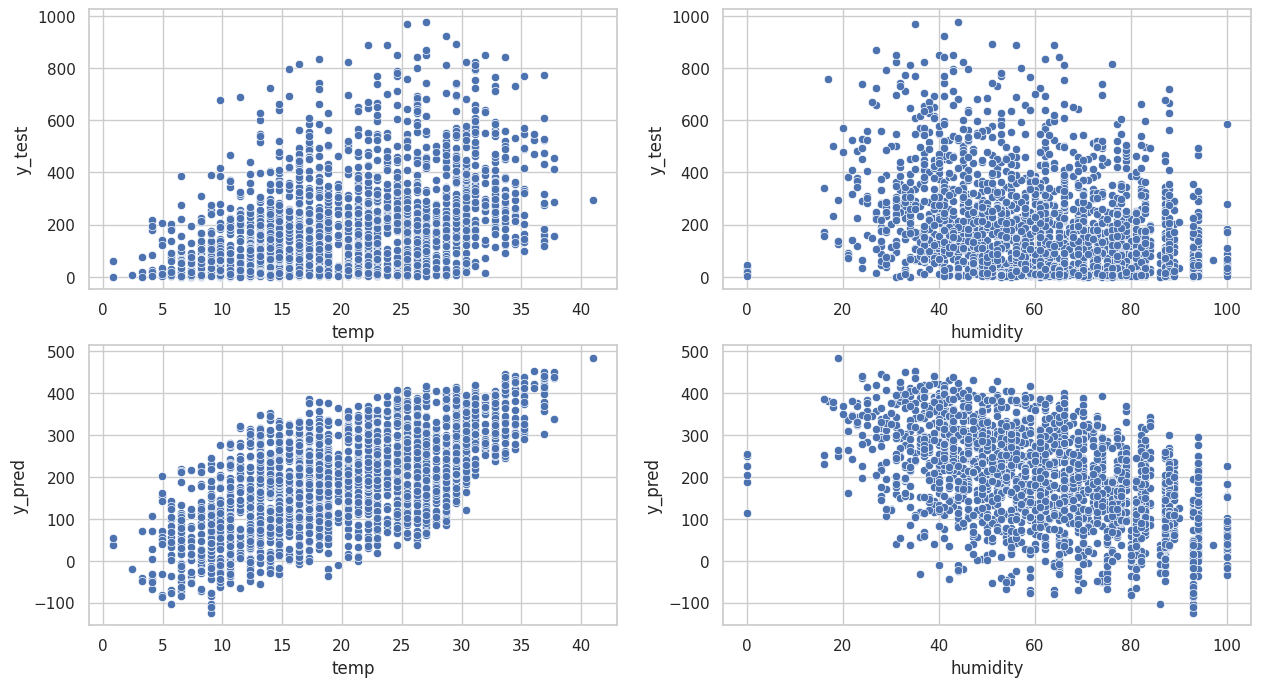

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

data = X_test
data['y_test'] = y_test
data['y_pred'] = y_pred

fig  = plt.figure(figsize=(15, 8))
axies = fig.subplots(nrows=2, ncols=2)

# answer
sns.scatterplot(data=data, x='temp', y='y_test', ax=axies[0][0])
sns.scatterplot(data=data, x='humidity', y='y_test', ax=axies[0][1])

# predict
sns.scatterplot(data=data, x='temp', y='y_pred', ax=axies[1][0])
sns.scatterplot(data=data, x='humidity', y='y_pred', ax=axies[1][1])

plt.show()


(8) 회고.  
- 학습모델 "회귀"에 대하여 모델과 성능 측정등을 테스트하였다.
- 마지막 그래프와 같이 일정 형태로 회귀되는 것을 확인할 수 있다.
- 불필요 컬럼을 제거하고, 아래와 같이 'good_weatehr'컬럼을 추가하여 성능 개선을 확인 할 수 있었다.  

    - "good_weather" 컬럼 없을때 :  
        - r2 score : 0.388357  
        - mse score : 20574.557419  
        - rmse score : 143.438340  
        - mae score : 107.475468  
    <br />
    - "good_weather" 컬럼 추가시:  
        - r2 score : 0.390738  
        - mse score : 20494.481563  
        - rmse score : 143.158938  
        - mae score : 107.165262   
<br />
<br />

- 충분한 검토와 다양한 종류의 학습이 필요하나, 시간이 부족했다.
